<a href="https://colab.research.google.com/github/sanskruti-1234/ML/blob/main/Practical_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz


In [23]:
try:
    df = pd.read_csv("Myntra Fashion Clothing.csv")
except FileNotFoundError:
    print("Error: Myntra Fashion Clothing.csv not found. Please provide the correct file path.")
    exit()
print(df.head())

<ipython-input-23-fe276ca385f4>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Myntra Fashion Clothing.csv")


                                                 URL  Product_id   BrandName  \
0  https://www.myntra.com/jeans/roadster/roadster...     2296012    Roadster   
1  https://www.myntra.com/track-pants/locomotive/...    13780156  LOCOMOTIVE   
2  https://www.myntra.com/shirts/roadster/roadste...    11895958    Roadster   
3  https://www.myntra.com/shapewear/zivame/zivame...     4335679      Zivame   
4  https://www.myntra.com/tshirts/roadster/roadst...    11690882    Roadster   

                Category Individual_category category_by_Gender  \
0            Bottom Wear               jeans                Men   
1            Bottom Wear         track-pants                Men   
2                Topwear              shirts                Men   
3  Lingerie & Sleep Wear           shapewear              Women   
4                Western             tshirts              Women   

                                         Description  DiscountPrice (in Rs)  \
0  roadster men navy blue slim fit mi

In [25]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.Categorical(df[col])
        df[col] = df[col].cat.codes
    elif df[col].dtype == 'float64':
        df[col] = df[col][df[col].notna()].astype(int)

In [26]:
df = pd.get_dummies(df, drop_first=True)

In [27]:
X = df.drop('OriginalPrice (in Rs)', axis=1)
y = df['OriginalPrice (in Rs)']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [40]:
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.11965284437818693


In [41]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

          99       0.00      0.00      0.00         2
         139       0.00      0.00      0.00         3
         149       0.00      0.00      0.00         3
         150       0.00      0.00      0.00         1
         179       0.00      0.00      0.00         2
         199       0.00      0.00      0.00        22
         200       0.00      0.00      0.00         1
         209       0.00      0.00      0.00         5
         210       0.00      0.00      0.00         2
         215       0.00      0.00      0.00         1
         219       0.00      0.00      0.00         3
         224       0.00      0.00      0.00         2
         225       0.00      0.00      0.00         2
         229       0.00      0.00      0.00         7
         236       0.00      0.00      0.00         1
         239       0.00      0.00      0.00        12
         240       0.00      0.00      0.00         1
  

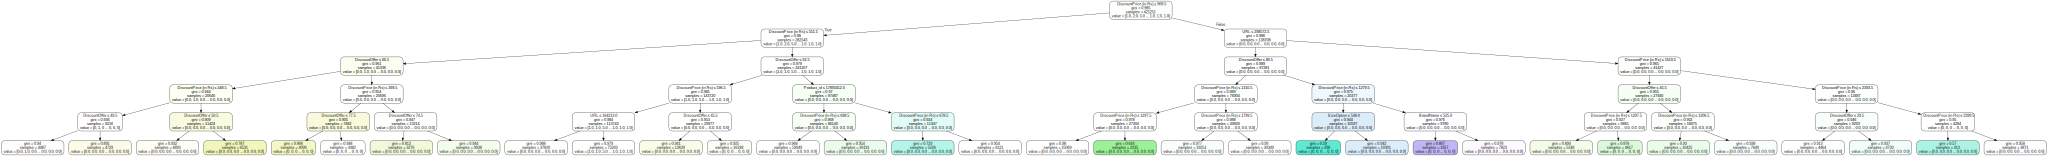

In [46]:
dot_data = export_graphviz(dt_classifier, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data.replace('graph {', 'graph { rankdir=LR;'))
display(graph)

In [35]:
from sklearn.tree import export_text
tree_rules = export_text(dt_classifier, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n", tree_rules)


Decision Tree Rules:
 |--- DiscountPrice (in Rs) <= 909.50
|   |--- DiscountPrice (in Rs) <= 551.50
|   |   |--- DiscountOffer <= 66.50
|   |   |   |--- DiscountPrice (in Rs) <= 448.50
|   |   |   |   |--- DiscountOffer <= 49.50
|   |   |   |   |   |--- class: 499
|   |   |   |   |--- DiscountOffer >  49.50
|   |   |   |   |   |--- class: 799
|   |   |   |--- DiscountPrice (in Rs) >  448.50
|   |   |   |   |--- DiscountOffer <= 50.50
|   |   |   |   |   |--- class: 799
|   |   |   |   |--- DiscountOffer >  50.50
|   |   |   |   |   |--- class: 999
|   |   |--- DiscountOffer >  66.50
|   |   |   |--- DiscountPrice (in Rs) <= 399.50
|   |   |   |   |--- DiscountOffer <= 77.50
|   |   |   |   |   |--- class: 999
|   |   |   |   |--- DiscountOffer >  77.50
|   |   |   |   |   |--- class: 1299
|   |   |   |--- DiscountPrice (in Rs) >  399.50
|   |   |   |   |--- DiscountOffer <= 74.50
|   |   |   |   |   |--- class: 1299
|   |   |   |   |--- DiscountOffer >  74.50
|   |   |   |   |   |--- 